In [1]:
%load_ext autoreload
%autoreload 2

# Zgoubidoo tutorial

A gentle introduction to Zgoubidoo: a modern Python 3 interface to the Zgoubi ray-tracing code.

Tutorial's objectives:
- Build Zgoubi simulations from scratch with no advanced knowledge of Zgoubi or Python
- Introduce key concepts usefull for a wide range of Zgoubi simulations
- Highlights advantages of Zgoubidoo: ease of use, repeatability, speed (especially on multi-core computers, aka. any computers)

## Getting started

Assume you have the `zgoubi` executable located somewhere in your path.

### Import zgoubidoo

In [2]:
import zgoubidoo
from zgoubidoo.commands import *

All physical quantities used by `zgoubidoo` have units. For simplicity the 'units registry' can get a short name:

In [3]:
from zgoubidoo import ureg as _

Let's have a first look at units:

In [4]:
a = 1 * _.m
b = 1 * _.m + 10 * _.cm
b += a
b.to('hectometers').magnitude

0.021

A bit more interesting:

In [5]:
brho = 1 * _.tesla * 10 * _.cm
brho.to('kilogauss meter')

1.0 <Unit('kilogauss * meter')>

**Exercice**: define quantities in other units of interest for Zgoubi simulations. In particular, try angles, energies, etc.

### Import additionnal very useful Python packages

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Exercice**: Have a look at what `matplotlib`, `numpy` and `pandas` are and what they can do.

### A first look at Zgoubi keywords and Zgoubidoo commands

All `zgoubi` commands ('KEYWORDS') have their equivalent `zgoubidoo` class. They all inhereit from the `zgoubidoo.commands.Command` base class which overloads a bunch of "special" Python functions. Most notably the `__str__` function.

In [7]:
Quadrupole

zgoubidoo.commands.magnetique.Quadrupole

In [8]:
Venus

zgoubidoo.commands.magnetique.Venus

In [9]:
ChangRef

zgoubidoo.commands.commands.ChangRef

In [10]:
Fit

zgoubidoo.commands.actions.Fit

In [11]:
Particule

zgoubidoo.commands.particules.Particule

In [12]:
Tosca

zgoubidoo.commands.fieldmaps.Tosca

**Exercice**: Find your favorite command. Complain if it's not available. (*bonus*) Implement a new command, just to see how easy it is.

And so on.

To create a command one needs to instanciate an object from the corresponding class:

In [13]:
Quadrupole('MY_QUAD')


        
        'QUADRUPO' MY_QUAD
        0
        0.000000000000e+00 1.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

All commands have sensible (at least I'm aiming for that) default values. This means that it is possible to create a working command without changing anything.

Note that the *LABEL1* attribute gets an automatically created random value. This is useful, see later.

Of course the next step is to look at the parameters of the command. The `PARAMETERS` attribute of each class provides the full list of available parameters, along with their default values and a documentation string.

In [14]:
Quadrupole.PARAMETERS

{'LABEL1': ('',
  'Primary label for the Zgoubi command (default: auto-generated hash).'),
 'LABEL2': ('', 'Secondary label for the Zgoubi command.'),
 'HEIGHT': (20 <Unit('centimeter')>,
  'Height of the magnet (distance between poles), used by plotting functions.'),
 'REFERENCE_FIELD_COMPONENT': ('BZ',
  'Orientation of the reference field (used by field maps)'),
 'KINEMATICS': (None, 'A kinematics object.'),
 'WIDTH': (50 <Unit('centimeter')>,
  'Width of the magnetic poles (used for plotting only).'),
 'APERTURE_LEFT': (10 <Unit('centimeter')>,
  'Aperture size of the magnet, left side (used for plotting only).'),
 'APERTURE_RIGHT': (10 <Unit('centimeter')>,
  'Aperture size of the magnet, right side (used for plotting only).'),
 'APERTURE_TOP': (10 <Unit('centimeter')>,
  'Aperture size of the magnet, top side (used for plotting only).'),
 'APERTURE_BOTTOM': (10 <Unit('centimeter')>,
  'Aperture size of the magnet, bottom side (used for plotting only).'),
 'COLOR': ('#FF0000', 'Ma

When the command is created those parameters are instanciated as `attributes`:

In [15]:
Quadrupole().attributes

{'LABEL1': '69e5f1520d574b8391de',
 'LABEL2': '',
 'HEIGHT': 20 <Unit('centimeter')>,
 'REFERENCE_FIELD_COMPONENT': 'BZ',
 'KINEMATICS': None,
 'WIDTH': 50 <Unit('centimeter')>,
 'APERTURE_LEFT': 10 <Unit('centimeter')>,
 'APERTURE_RIGHT': 10 <Unit('centimeter')>,
 'APERTURE_TOP': 10 <Unit('centimeter')>,
 'APERTURE_BOTTOM': 10 <Unit('centimeter')>,
 'COLOR': '#FF0000',
 'IL': 0,
 'XL': 0 <Unit('centimeter')>,
 'R0': 1.0 <Unit('centimeter')>,
 'B0': 0 <Unit('kilogauss')>,
 'XE': 2.0 <Unit('centimeter')>,
 'LAM_E': 0 <Unit('centimeter')>,
 'C0_E': 0,
 'C1_E': 1,
 'C2_E': 0,
 'C3_E': 0,
 'C4_E': 0,
 'C5_E': 0,
 'XS': 2.0 <Unit('centimeter')>,
 'LAM_S': 0 <Unit('centimeter')>,
 'C0_S': 0,
 'C1_S': 1,
 'C2_S': 0,
 'C3_S': 0,
 'C4_S': 0,
 'C5_S': 0,
 'XPAS': 0.1 <Unit('centimeter')>,
 'KPOS': 1,
 'XCE': 0 <Unit('centimeter')>,
 'YCE': 0 <Unit('centimeter')>,
 'ALE': 0 <Unit('radian')>}

Some have default values:

In [16]:
Quadrupole().defaults

{'LABEL2': '',
 'HEIGHT': 20 <Unit('centimeter')>,
 'REFERENCE_FIELD_COMPONENT': 'BZ',
 'KINEMATICS': None,
 'WIDTH': 50 <Unit('centimeter')>,
 'APERTURE_LEFT': 10 <Unit('centimeter')>,
 'APERTURE_RIGHT': 10 <Unit('centimeter')>,
 'APERTURE_TOP': 10 <Unit('centimeter')>,
 'APERTURE_BOTTOM': 10 <Unit('centimeter')>,
 'COLOR': '#FF0000',
 'IL': 0,
 'XL': 0 <Unit('centimeter')>,
 'R0': 1.0 <Unit('centimeter')>,
 'B0': 0 <Unit('kilogauss')>,
 'LAM_E': 0 <Unit('centimeter')>,
 'C0_E': 0,
 'C1_E': 1,
 'C2_E': 0,
 'C3_E': 0,
 'C4_E': 0,
 'C5_E': 0,
 'LAM_S': 0 <Unit('centimeter')>,
 'C0_S': 0,
 'C1_S': 1,
 'C2_S': 0,
 'C3_S': 0,
 'C4_S': 0,
 'C5_S': 0,
 'XPAS': 0.1 <Unit('centimeter')>,
 'KPOS': 1,
 'XCE': 0 <Unit('centimeter')>,
 'YCE': 0 <Unit('centimeter')>,
 'ALE': 0 <Unit('radian')>}

Others have non-default values:

In [17]:
Quadrupole().nondefaults

{'LABEL1': '4bbab89706404eff8321',
 'XE': 2.0 <Unit('centimeter')>,
 'XS': 2.0 <Unit('centimeter')>}

Note that the initializer of `Quadrupole` is taking the initiative of setting `XE` and `XS` to twice the bore radius.

Specific values for the attributes can be defined at the creation of the object:

In [18]:
Quadrupole('COOL_QUAD', XL=2*_.meter, XPAS=30*_.mm)


        
        'QUADRUPO' COOL_QUAD
        0
        2.000000000000e+02 1.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        3.0
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

Of course it is possible to change and access the attributes values at any time:

In [19]:
my_quad = Quadrupole('COOL_QUAD', XL=2*_.m, XPAS=3*_.centimeter)
my_quad.KPOS = 2
my_quad.B0 = 2 * _.tesla
print(f"The field at the pole tips is now {my_quad.B0}.")
my_quad

The field at the pole tips is now 2 tesla.



        
        'QUADRUPO' COOL_QUAD
        0
        2.000000000000e+02 1.000000000000e+00 2.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        3.0
        2 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

In [20]:
my_quad.B0

2 <Unit('tesla')>

And look again at the nondefault attributes:

In [21]:
my_quad.nondefaults

{'LABEL1': 'COOL_QUAD',
 'XL': 2 <Unit('meter')>,
 'B0': 2 <Unit('tesla')>,
 'XE': 2.0 <Unit('centimeter')>,
 'XS': 2.0 <Unit('centimeter')>,
 'XPAS': 3 <Unit('centimeter')>,
 'KPOS': 2}

**Exercice**: define other objects, explore the different Zgoubi keywords, change the attributes, etc. In particular: create a custom BEND, a custome DRIFT.

What if your favorite command is missing?

Zgoubidoo provides different mechanisms to deal with that, maybe the easiest one is to use the `Fake` command:

In [22]:
Fake

zgoubidoo.commands.commands.Fake

In [23]:
Fake('FAKE1', INPUT="""
    'FRANCOIS' {LABEL1} 
    1.0 2.0 3.0
"""
)


    'FRANCOIS' FAKE1 
    1.0 2.0 3.0

In [24]:
class FancyQuadrupole(Quadrupole):
    PARAMETERS = {
        'B0': 10 * _.tesla,
        'C0_E': 33.3,
    }
    
    def __post__init__(arg1):
        pass

FancyQuadrupole('MY_FANCYQ')


        
        'QUADRUPO' MY_FANCYQ
        0
        0.000000000000e+00 1.000000000000e+00 1.000000000000e+02
        2.000000000000e+00 0.000000000000e+00
        6 3.330000000000e+01 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

### Creating a first Zgoubi input file

To create a zgoubi input file `zgoubidoo` provides a dedicated class: `zgoubidoo.Input`. An input can have a name and will hold a list of `zgoubidoo.commands` objects.

The `zgoubidoo.Input` objects also override the `__str__` method, which allows to automatically print them or save them to files.

In [25]:
zgoubidoo.Input()

beamline
        'END' 901b0d843c894e028e36 
        

To make life easier, `zgoubidoo` will automatically add a `End` command at the end of each input.

Let's get started and create a FODO sequence.

In [26]:
qf = Quadrupole('QF', XL=1*_.m, B0=1 * _.tesla)
qd = Quadrupole('QD', XL=1*_.m, B0=-1 * _.tesla)

zi = zgoubidoo.Input(name='FODO', line=[
    qf,
    Drift(XL=1 * _.m),
    qd,
    Drift(XL=1 * _.m),
])  # zi stands for `zgoubi input`
zi

FODO
        
        'QUADRUPO' QF
        0
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        
        
        'DRIFT' 1d2a50cee63b493bb138
        1.000000000000e+02 split 10 0
        
        
        'QUADRUPO' QD
        0
        1.000000000000e+02 1.000000000000e+00 -1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+

We are close to being able to run this with Zgoubi. But one more thing: let's define the particle type and add a beam (*ie.* a `zgoubi` objet).

Zgoubidoo defines classes for a relatively large set of common particles:

In [27]:
import inspect
inspect.getmembers(zgoubidoo.commands.particules, inspect.isclass)

[('AntiMuon', zgoubidoo.commands.particules.AntiMuon),
 ('AntiProton', zgoubidoo.commands.particules.AntiProton),
 ('CarbonIon', zgoubidoo.commands.particules.CarbonIon),
 ('Electron', zgoubidoo.commands.particules.Electron),
 ('HMinus', zgoubidoo.commands.particules.HMinus),
 ('HeliumIon', zgoubidoo.commands.particules.HeliumIon),
 ('ImmortalAntiMuon', zgoubidoo.commands.particules.ImmortalAntiMuon),
 ('ImmortalMuon', zgoubidoo.commands.particules.ImmortalMuon),
 ('Ion', zgoubidoo.commands.particules.Ion),
 ('LeadIon', zgoubidoo.commands.particules.LeadIon),
 ('Muon', zgoubidoo.commands.particules.Muon),
 ('NativeParticule', zgoubidoo.commands.particules.NativeParticule),
 ('NativeParticuleType', zgoubidoo.commands.particules.NativeParticuleType),
 ('OxygenIon', zgoubidoo.commands.particules.OxygenIon),
 ('Particule', zgoubidoo.commands.particules.Particule),
 ('ParticuleType', zgoubidoo.commands.particules.ParticuleType),
 ('Pion', zgoubidoo.commands.particules.Pion),
 ('Positron', z

Let's use a proton:

In [29]:
Electron()


        'PARTICUL' ELECTRON
        ELECTRON
            

In [31]:
Proton(NATIVE=False)


        'PARTICUL' PROTON
        9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
        

We will also need to define the energy, momentum, etc. of the particles. To that end, `zgoubidoo` provides a very easy to use `Kinematics` class:

In [32]:
k = zgoubidoo.Kinematics(2 * _.GeV)
k


        Proton
        Total energy: 1999.9999999999998 megaelectronvolt
        Kinetic energy: 1061.7279699999997 megaelectronvolt
        Momentum: 1.7662518500258333 gigaelectronvolt / speed_of_light
        Magnetic rigidity: 5.891582002459293 meter * tesla
        Range in water (protons only): 407.2585159114895 centimeter
        Relativistic beta: 0.8831259250129166
        Relativistic gamma: 2.1315779817075007
        

The constructor will infer the quantity based on the units, and provide a bunch of conversions if needed:

In [33]:
k.brho.to('kilogauss centimeter')

5891.582002459292 <Unit('centimeter * kilogauss')>

Next step is to define a `zgoubi` *Objet*. We can either directly use the objet classes or use an abstraction provided by `zgoubidoo`: `Beam`.
    
Let's start with `Objet2`.

In [34]:
Objet2('BUNCH', BORO=k.brho)


        'OBJET' BUNCH
        5.891582002459e+03
        2.00
        1 1
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
        1

We are all set, let's redfine the `zgoubi.Input`:

In [48]:
qf = Quadrupole('QF', XL=1*_.m, B0=1 * _.tesla)
qd = Quadrupole('QD', XL=1*_.m, B0=-1 * _.tesla)

zi = zgoubidoo.Input(name='FODO', line=[
    Objet2('BUNCH', BORO=k.brho),
    Proton(),
    qf,
    Drift(XL=1 * _.m),
    qd,
    Drift(XL=1 * _.m),
])  # zi stands for `zgoubi input`
zi.IL = 2
zi

FODO
        'OBJET' BUNCH
        5.891582002459e+03
        2.00
        1 1
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
        1

        'PARTICUL' PROTON
        PROTON
            
        
        'QUADRUPO' QF
        2
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        
        
        'DRIFT' e1b50046c0d34992adf4
        1.000000000000e+02 split 10 2
        
        
        'QUADRUPO' QD
        2
        1.000000000000e+02 1.000000000000e+00 -1.000000000000e+0

At this point you should be really impatient to run this with Zgoubi...

As you guessed `zgoubidoo` provides a class `Zgoubi` which is an abstraction to the `zgoubi` executable:

In [49]:
z = zgoubidoo.Zgoubi()
z

It doesn't do much, but when you **call** it `zgoubi` will be run:

In [50]:
z(zi)

Looked like nothing happened... but `zgoubi` has been executed.

Now a little detour: `zgoubidoo` works beautifully with multi-threading, all in a transparent way. This means that you can launch multiple instances of `zgoubi` at the same time, even in an interactive session like this one, without blocking.

The drawback is that you need to collect the results:

In [51]:
z.cleanup()
zr = z(zi).collect()  # zr stands for 'zgoubi results'
zr

Once more, all the resutls are encapsulated in a `ZgoubiResults` class.

It has many functionalities:

In [52]:
zr.print()

Results for mapping {}

FODO
 'OBJET' BUNCH                                                                                                1
5.891582002459e+03
2.00
1 1
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
1
 
 'PARTICUL' PROTON                                                                                            2
PROTON
 
 
 'QUADRUPO' QF                                                                                                3
2
1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
2.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
2.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
0.1
1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
 
 
 'DRIFT' e1b50046c0d34992adf4             

The default behavior of `ZgoubiResults.print()` is to show the `zgoubi.res` file.

It is possible to look at other results.

In [53]:
zr.print('stdout')

Results for mapping {}


  Zgoubi, author's dvlpmnt version.
  Job  started  on  21-07-2019,  at  08:45:21 
   Copying  zgoubi.dat  into  zgoubi.res,
   numbering  and  labeling  elements...

 Title : FODO                                                                            


    1/    7 OBJET     /BUNCH               /                                    
    2/    7 PARTICUL  /PROTON              /                                    
    3/    7 QUADRUPO  /QF                  /                                    
    4/    7 DRIFT     /e1b50046c0d34992adf4/                                    
    5/    7 QUADRUPO  /QD                  /                                    
    6/    7 DRIFT     /ca00b7a8f381447ea522/                                    
    7/    7 END       /                    /                                    

 Pgm zgoubi : Execution ended normally, upon keyword END or FIN.

  Zgoubi, author's dvlpmnt version.
  Job  started  on  21-07-2019,  at  08:45:21 

OK, now this is really cool! Look at this:

In [80]:
!which zgoubi

/usr/local/bin/zgoubi


In [79]:
!head /var/folders/r0/hjx4gm291nlgl0mk9wm703tm0000gn/T/tmpgbr19lpc/zgoubi.plt

# TRAJECTORIES - STORAGE FILE, 21-07-2019 08:46:47. FODO                                                                                                                                                                                                                                                                                                                                    
#  1 ,  2   , 3 ,  4 , 5 ,  6 , 7 ,  8  ,  9   , 10  ,  11, 12,  13, 14, 15  , 16  , 17,  18 , 19 , 20  ,  21 , 22, 23, 24, 25,  26  ,  27  ,  28  ,   29 ,  30 , 31  , 32   ,  33  ,  34 ,  35 , 36  ,  37, 38 , 39 ,  40  , 41   , 42  ,   43  , 44    , 45    ,   46                                                                                                                     
# KEX,  Do-1, Yo,  To, Zo,  Po, So,   to,   D-1, Y-DY,   T,  Z,   P,  S, time, beta, DS, KART,  IT, IREP, SORT,  X, BX, BY, BZ,   RET,   DPR,    PS,   SXo,  SYo,  SZo, modSo,    SX,   SY,   SZ, modS,  EX,  EY,  EZ,  BORO, IPASS, NOEL,   K

In [78]:
zr.tracks.head(10)

/var/folders/r0/hjx4gm291nlgl0mk9wm703tm0000gn/T/tmpgbr19lpc/zgoubi.plt
Index(['# KEX', 'Do-1', 'Yo', 'To', 'Zo', 'Po', 'So', 'to', 'D-1', 'Y-DY', 'T',
       'Z', 'P', 'S', 'time', 'beta', 'DS', 'KART', 'IT', 'IREP', 'SORT', 'X',
       'BX', 'BY', 'BZ', 'RET', 'DPR', 'PS', 'SXo', 'SYo', 'SZo', 'modSo',
       'SX', 'SY', 'SZ', 'modS', 'EX', 'EY', 'EZ', 'BORO', 'IPASS', 'NOEL',
       'KLEY', 'LABEL1', 'LABEL2', 'LET'],
      dtype='object')


,Do-1,Yo,To,Zo,Po,So,to,D-1,T,Z,...,YR,ZR,XG,YG,ZG,XRG,YRG,ZRG,TG,PG
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001,0.0,0.0,1.001,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002,0.0,0.0,1.002,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003,0.0,0.0,1.003,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.004,0.0,0.0,1.004,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005,0.0,0.0,1.005,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006,0.0,0.0,1.006,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007,0.0,0.0,1.007,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.008,0.0,0.0,1.008,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.009,0.0,0.0,1.009,0.0,0.0,0.0,0.0


The tracking results have been automatically extracted and collected in a nice look `pandas.DataFrame`.

The other typicall "results files" of `zgoubi` can be read as well:

In [ ]:
# ! read in zgoubi/*.f grep PRINT  for all the supported PRINT commands

In [57]:
zr.srloss

Unable to read and load the Zgoubi SRLOSS files required to collect the SRLOSS data.


""


In [58]:
zr.matrix

Unable to read and load the Zgoubi MATRIX files required to collect the matrix data.


In [59]:
zr.optics

Unable to read and load the Zgoubi OPTICS files required to collect the matrix data.


But of course we'll have to work a bit harder for that.

Let's try to get some Twiss parameters.

Back to the input.

The line is a list (actually a `deque`) of commands. Let's see how we can manipulate it.

In [ ]:
# ! zpop can read in .fai while zgoubi is running (for a long run). look at what's possible to do
# FORTRAN flush command

In [60]:
len(zi)  # 6 commands at this point

6

In [61]:
zi.line.append(Matrix())

In [62]:
list(filter(lambda _: _.LABEL1 == 'QD', zi))

[
         
         'QUADRUPO' QD
         2
         1.000000000000e+02 1.000000000000e+00 -1.000000000000e+01
         2.000000000000e+00 0.000000000000e+00
         6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
         2.000000000000e+00 0.000000000000e+00
         6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
         0.1
         1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
         ]

In [63]:
zi.replace('BUNCH', Objet5('BUNCH', BORO=k.brho))

FODO
        'OBJET' BUNCH
        5.891582002459e+03
        5.01
        1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
        0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00

        'PARTICUL' PROTON
        PROTON
            
        
        'QUADRUPO' QF
        2
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.0000000

This worked as expected. Let's run it again.

In [64]:
z.cleanup()
zr = z(zi).collect()

We would like to see if this worked, but without scrolling through the entire output...

In [73]:
# BUGG zi.zgoubi_index('QD')

1

In [65]:
print('\n'.join(zi[Matrix][0].output[0][1]))

      7  Keyword, label(s) :  MATRIX      bdca931f19c641fd946d                                                         IPASS= 1
  Matrix coefficients are printed in  zgoubi.MATRIX.out.
  Reference, before change of frame (part #     1)  : 
   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   4.00000000E+02   1.51083369E-02
           Frame for MATRIX calculation moved by :
            XC =    0.000 cm , YC =    0.000 cm ,   A =  0.00000 deg  ( = 0.000000 rad )
  Reference, after change of frame (part #     1)  : 
   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   4.00000000E+02   1.51083369E-02
  Reference particle (#     1), path length :   400.00000     cm  relative momentum :    1.00000    
                  TRANSFER  MATRIX  ORDRE  1  (MKSA units)
           581.175        -141.063         0.00000         0.00000         0.00000         0.00000    
           467.632        -113.502         0.00000         0.00

In [66]:
zr.matrix#.at[0, 'R11']

,R11,R12,R13,R14,R15,R16,R21,R22,R23,R24,...,QZ,XCE,YCE,ALE,ALPHA11,BETA11,GAMMA11,ALPHA22,BETA22,GAMMA22
0,581.174611,-141.062577,0.0,0.0,0.0,0.0,467.63198,-113.502458,0.0,0.0,...,undefined,0.0,0.0,0.0,-0.0,0.0,inf,-0.0,0.0,inf


**Exercice**: go back and adapt the FODO example to obtain a stable solution.

### Visualization with Zgoubidoo

Zgoubidoo offers default visualization to plot beamlines, tracking data, etc. Let's have a look.

In [67]:
zi.plot()

ZgoubiInputException: The input must be surveyed explicitely before plotting.

OK... what is this "survey" thing?

All elements of a Zgoubidoo beamline are positionned with respect to a given coordinates frame. The survey operation consists in associating a global reference frame with the beamline.

In [68]:
zi.survey()

In [70]:
zi.QD.entry.x

2.0 <Unit('meter')>

In [71]:
zi.QD.entry.get_rotation_matrix()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Let's make some nice plots...

AttributeError: module 'zgoubidoo.vis' has no attribute 'cartouche'

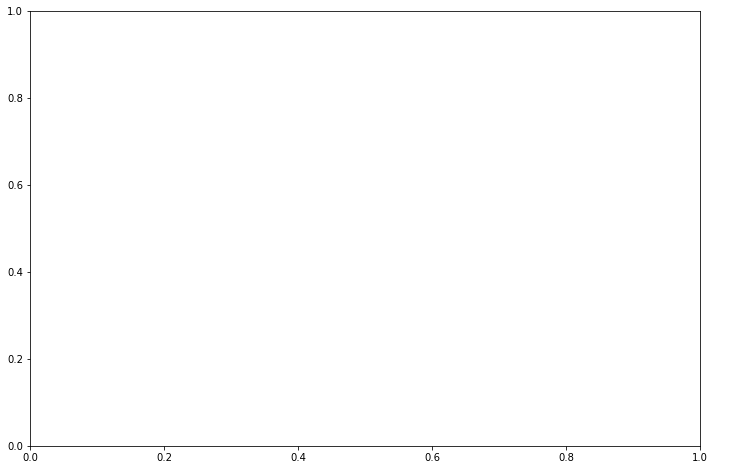

In [74]:
artist = zgoubidoo.vis.MatplotlibArtist()
zgoubidoo.vis.cartouche(line=zi, artist=artist)
zi.plot(ax=artist.ax, tracks=zr.tracks)

Let's modify the input to improve the plotting. The following example will:

 - illustrate how to add more elements to the input;
 - illustrate how one can misalign elements.

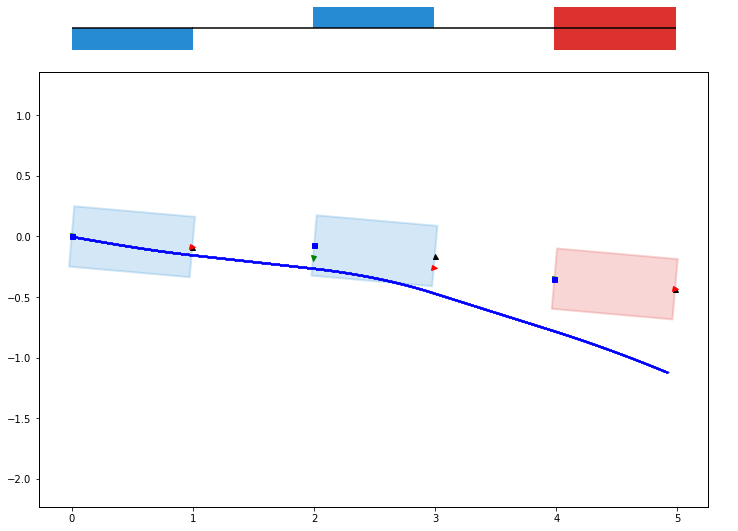

In [90]:
qf = Quadrupole('QF', XL=1*_.m, B0=0.1 * _.tesla, ALE=5*_.degree, KPOS=1)
qd = Quadrupole('QD', XL=1*_.m, B0=-0.05 * _.tesla, YCE=10*_.cm, KPOS=2)

zi = zgoubidoo.Input(name='FODO', line=[
    Objet2('BUNCH', BORO=k.brho),
    Proton(),
    qf,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
    qd,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
    Multipole(XL=1 * _.m, B1=5 * _.kilogauss),
])
zi.survey()

#zi.XPAS = 0.01 * _.m  # Note that the parameters of all the elements in the input can be set with a single command
z = zgoubidoo.Zgoubi()
zr = z(zi).collect()

artist = zgoubidoo.vis.ZgoubiMpl()
zgoubidoo.vis.cartouche(line=zi, artist=artist)
zi.plot(ax=artist.ax, tracks=zr.tracks)

At the end of a Zgoubi run it is possible to save the input file and one or more output files to a permanent directory (by default Zgoubidoo runs everything in temporary directories).

In [69]:
zr.save('.', ['zgoubi.dat', 'zgoubi.res', 'zgoubi.log'])

## Tracking on multi-core machines

`zgoubi` itself is purely single process, single thread. However, `zgoubidoo` makes it easy to track particles on multi-core machines. Doing so with `zgoubidoo` is totaly transparent for the user, at the time of the input preparation and at the time of the collection of the results.

To illustrate this, let's reuse our previous input, but this time with a real bunch. This is so common that `zgoubidoo` provides an abstraction layer on top of the `zgoubi` *objets*.

### Using `zgoubidoo` beams

`zgoubidoo` provides different subclasses of `zgoubidoo.commands.beam.Beam` to suit specific needs. Here we will use the `BeamZgoubiDistribution` 

In [97]:
my_bunch = BeamZgoubiDistribution('BUNCH', kinematics=k, particle=Proton, IMAX=1e4)
my_bunch


        ! Definition of BeamZgoubiDistribution
    
        'MCOBJET' BUNCH 
        5.891582002459e+01
        3
        10000
        2 2 2 2 2 1
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
        0.000000000000e+00 1.000000000000e+00 1.000000000000e-09 10  0.000000000000e+00 0.000000000000e+00
        0.000000000000e+00 1.000000000000e+00 1.000000000000e-09 10  0.000000000000e+00 0.000000000000e+00
        0.000000000000e+00 1.000000000000e+00 1.000000000000e-09 10 
        877079 641140 486197
    
        'PARTICUL' PROTON
        9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
        

In [99]:
qf = Quadrupole('QF', XL=1*_.m, B0=0.1 * _.tesla, ALE=5*_.degree, KPOS=1)
qd = Quadrupole('QD', XL=1*_.m, B0=-0.05 * _.tesla, YCE=10*_.cm, KPOS=2)

zi = zgoubidoo.Input(name='FODO', line=[
    my_bunch,
    qf,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
    qd,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
])

#zi.XPAS = 1.0 * _.cm  # Note that the parameters of all the elements in the input can be set with a single command

Let's run `zgoubi` and track the distribution and check how long it takes.

In [100]:
%%timeit -n 1 -r 1
z = zgoubidoo.Zgoubi()
zr = z(zi).collect()

KeyboardInterrupt: 

That's about 20 seconds for 1e4 particules. The results (in this case the tracking data) are collected automatically:

In [113]:
print(zr.tracks.shape)
zr.tracks.head(5)

(754931, 58)


,Do-1,Yo,To,Zo,Po,So,to,D-1,T,Z,...,YR,ZR,XG,YG,ZG,XRG,YRG,ZRG,TG,PG
0,0.000093,0.000002,-0.000061,-0.000011,3.412901e-07,-0.002725,-0.000005,0.000093,-0.087328,-0.000011,...,-0.087215,-0.000010,1.913613e-07,0.000002,-0.000011,0.984797,-0.173706,-0.000010,-0.174594,3.412901e-07
1,0.000093,0.000002,-0.000061,-0.000011,3.412901e-07,-0.002725,-0.000005,0.000093,-0.086591,-0.000011,...,-0.087351,-0.000029,9.848588e-03,-0.001732,-0.000011,0.994773,-0.174716,-0.000029,-0.173858,-1.778754e-05
2,0.000093,0.000002,-0.000061,-0.000011,3.412901e-07,-0.002725,-0.000005,0.000093,-0.084389,-0.000011,...,-0.086012,-0.000047,1.969952e-02,-0.003453,-0.000011,1.005003,-0.174267,-0.000047,-0.171656,-3.621966e-05
3,0.000093,0.000002,-0.000061,-0.000011,3.412901e-07,-0.002725,-0.000005,0.000093,-0.080759,-0.000012,...,-0.083220,-0.000067,2.955544e-02,-0.005144,-0.000012,1.015472,-0.172380,-0.000067,-0.168025,-5.526959e-05
4,0.000093,0.000002,-0.000061,-0.000011,3.412901e-07,-0.002725,-0.000005,0.000093,-0.075761,-0.000012,...,-0.079020,-0.000087,3.941856e-02,-0.006793,-0.000012,1.026159,-0.169099,-0.000087,-0.163027,-7.526242e-05


OK, now let's try again but using the true power of our multi-cores machines.

To that end `zgoubidoo` introduces the concept of **slices**. A given bunch (beam) will be divided in multiple slices. Each slice will be run by its own instance of `zgoubi`, in parallel.

In [114]:
my_bunch.slices = 4

In [ ]:
# Choice of the word 'slice'  ==> batch ?
# Actually slicing

In [115]:
%%timeit -n 1 -r 1
z = zgoubidoo.Zgoubi()
zr = z(zi).collect()

As expected we gained almost a factor 4!

And all the results from the 4 runs are collected together:

In [116]:
print(zr.tracks.shape)
zr.tracks.head(5)

(753434, 58)


,Do-1,Yo,To,Zo,Po,So,to,D-1,T,Z,...,YR,ZR,XG,YG,ZG,XRG,YRG,ZRG,TG,PG
0,0.000048,-0.000006,-0.000002,0.000075,-0.000074,0.000431,7.631593e-07,0.000048,-0.087268,0.000075,...,-0.087164,7.408181e-07,-5.681899e-07,-0.000006,0.000075,0.984807,-0.173656,7.408181e-07,-0.174535,-0.000074
1,0.000048,-0.000006,-0.000002,0.000075,-0.000074,0.000431,7.631593e-07,0.000048,-0.086517,0.000075,...,-0.087285,1.270739e-04,9.847944e-03,-0.001741,0.000075,0.994785,-0.174651,1.270739e-04,-0.173784,0.000052
2,0.000048,-0.000006,-0.000002,0.000075,-0.000074,0.000431,7.631593e-07,0.000048,-0.084302,0.000076,...,-0.085932,2.555735e-04,1.969902e-02,-0.003460,0.000076,1.005017,-0.174188,2.555735e-04,-0.171569,0.000180
3,0.000048,-0.000006,-0.000002,0.000075,-0.000074,0.000431,7.631593e-07,0.000048,-0.080660,0.000078,...,-0.083127,3.884320e-04,2.955509e-02,-0.005150,0.000078,1.015489,-0.172289,3.884320e-04,-0.167926,0.000310
4,0.000048,-0.000006,-0.000002,0.000075,-0.000074,0.000431,7.631593e-07,0.000048,-0.075652,0.000082,...,-0.078917,5.279160e-04,3.941839e-02,-0.006798,0.000082,1.026176,-0.168997,5.279160e-04,-0.162919,0.000446


### Parametric scans

TODO

## Importing MAD-X sequences

Zgoubidoo offers different interfaces to automatically load and convert MAD-X Twiss sequences. This section illustrates how this can be done using the LHeC as an example.

Zgoubidoo provides a `sequences` module aimed at abstracting the concepts of 'sequences' and 'beamlines'. A `zgoubidoo.sequences.Sequence` object is *not* a Zgoubi input: it is a generic sequence holding information to recreate a beamline. It is also 'code-independent': the information contained in the sequence can be used by 'converters' to convert the sequence onto a valid Zgoubi or MAD-X sequence.

The `Sequence` class provides different 'loaders' to initialize the sequence.

In [101]:
lhec_sequence = zgoubidoo.sequences.Sequence.from_madx_twiss(
    filename='twiss.outx',
    path='/Users/chernals/Downloads'
)

The loader create a specialized `TwissSequence` object:

In [102]:
type(lhec_sequence)

zgoubidoo.sequences.sequence.TwissSequence

The loaders will load not only the main Twiss table, but will also read the metadata and instanciate other quantities. The main Twiss table can be used as a `pandas.DataFrame`.

In [123]:
lhec_sequence.df.head(5)

,KEYWORD,S,BETX,ALFX,MUX,BETY,ALFY,MUY,X,PX,...,SIG54,SIG55,SIG56,SIG61,SIG62,SIG63,SIG64,SIG65,SIG66,N1
NAME,,,,,,,,,,,,,,,,,,,,,
LEFTIR$START,MARKER,0.00000,873.128000,0.184470,0.000000,894.842000,0.153707,0.000000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1S01,SBEND,4.00021,871.671113,0.248292,0.000730,893.349361,0.149129,0.000712,0.0,0.0,...,-2.685925e-12,2.812868e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRIFT_0,DRIFT,6.00021,870.682815,0.245857,0.001095,892.757422,0.146841,0.001068,0.0,0.0,...,-2.685925e-12,2.812868e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1S03,SBEND,10.00042,867.641175,0.514035,0.001828,891.601224,0.142254,0.001782,0.0,0.0,...,2.442131e-12,2.801806e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRIFT_1,DRIFT,12.00042,865.590862,0.511121,0.002195,891.036783,0.139966,0.002139,0.0,0.0,...,2.442131e-12,2.801806e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The Twiss headers are also available in the form of a `pandas.Series`:

In [125]:
lhec_sequence.metadata.data

KEY
NAME                   TWISS
TYPE                   TWISS
SEQUENCE              LEFTIR
PARTICLE            ELECTRON
MASS         0.0005109989461
CHARGE                    -1
ENERGY                    50
PC                        50
GAMMA            97847.55993
KBUNCH                     1
BCURRENT                   0
SIGE                   0.001
SIGT                       1
NPART                      0
EX                     1e-09
EY                     1e-09
ET                     0.001
BV_FLAG                    1
LENGTH           277.7075136
ALFA                       0
ORBIT5                    -0
GAMMATR                    0
Q1               1.944023321
Q2               3.107694746
DQ1                        0
DQ2                        0
DXMAX           0.5337412431
DYMAX          0.07095231483
XCOMAX                     0
YCOMAX                     0
BETXMAX          15149.82629
BETYMAX          15986.00492
XCORMS                     0
YCORMS                     0
DXRMS     

A `Kinematics` object is automatically infered from the Twiss headers.

In [126]:
lhec_sequence.metadata.kinematics


        Electron
        Total energy: 50000.000002611196 megaelectronvolt
        Kinetic energy: 49999.4890036651 megaelectronvolt
        Momentum: 50.0 gigaelectronvolt_per_c
        Magnetic rigidity: -166.78203367087505 meter * tesla
        Range in water (protons only): nan
        Relativistic beta: 0.999999999947776
        Relativistic gamma: 97847.55992985248
        

Same for the particle type.

In [127]:
lhec_sequence.metadata.particle

zgoubidoo.commands.particules.Electron

Also, Zgoubidoo provides a `BetaBlock` class that holds a set of Twiss parameters. The sequence will contain the 'beta0' block:

In [128]:
lhec_sequence.betablock

BetaBlock(beta11=873.128, alpha11=0.18447, gamma11=0.001184281320608204, beta22=894.842, alpha22=0.153707, gamma22=0.0011439179674724701, disp1=0.0, disp2=0.0, disp3=0.0, disp4=0.0)

Finally, as this is a Twiss sequence, a `BeamTwiss` is also created. This is another type of `zgoubidoo.beam` that abstracts the concept of `OBJET 5` from Zgoubi.

In [129]:
lhec_sequence.beam

(
         ! Definition of BeamTwiss
     
         'OBJET' 5ab21f5503
         -1.667820336709e+05
         5.01
         1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03
         0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
         1.844700000000e-01 8.731280000000e+02 1.537070000000e-01 8.948420000000e+02 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
 
         'PARTICUL' PROTON
         9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
         ,)

Now that we have the sequence, we need to convert it to a Zgoubi input. This is equallly easy to do.

Note that the beam definition is automatically included, with the correct initial Twiss parameters, correct particle type and correct BRHO.

In [104]:
zi_twiss = zgoubidoo.Input.from_sequence(lhec_sequence)

In [106]:
#zi_twiss

## Real machine Twiss computations

Let's add a Zgoubi 'OPTICS' keyword and see if we can reproduce the MAD-X Twiss.

In [108]:
#zi_twiss.XPAS = 20 * _.cm
zi_twiss.insert_after(zi_twiss.beam, Optics())
zi_twiss.survey(output=False)

In [109]:
z = zgoubidoo.Zgoubi()
zr_twiss = z(zi_twiss).collect()

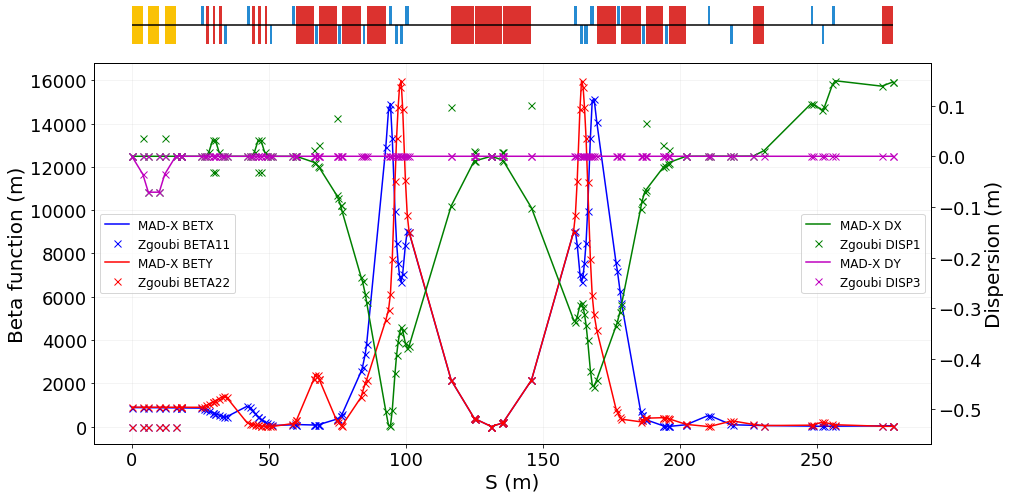

In [153]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
artist = zgoubidoo.vis.ZgoubiMpl(ax=ax)
zgoubidoo.vis.cartouche(line=zi_twiss, artist=artist)

ax.plot(lhec_ir.df['S'], lhec_ir.df['BETX'], 'b-', ms=10, label='MAD-X BETX')
ax.plot(zr_twiss.optics['S'], zr_twiss.optics['BETA11'], 'bx', ms=7, label='Zgoubi BETA11')

ax.plot(lhec_ir.df['S'], lhec_ir.df['BETY'], 'r-', ms=10, label='MAD-X BETY')
ax.plot(zr_twiss.optics['S'], zr_twiss.optics['BETA22'], 'rx', ms=7, label='Zgoubi BETA22')


ax2 = ax.twinx()
ax2.plot(lhec_ir.df['S'], lhec_ir.df['DX'], 'g-', ms=10, label='MAD-X DX')
ax2.plot(zr_twiss.optics['S'], zr_twiss.optics['DISP1'], 'gx', ms=7, label='Zgoubi DISP1')

ax2.plot(lhec_ir.df['S'], lhec_ir.df['DY'], 'm-', ms=10, label='MAD-X DY')
ax2.plot(zr_twiss.optics['S'], zr_twiss.optics['DISP3'], 'mx', ms=7, label='Zgoubi DISP3')

ax.legend(loc=6, fontsize=12)
ax2.legend(loc=5, fontsize=12)
artist.ax.grid(True, alpha=0.2)
artist.ax.set_xlabel("S (m)", fontsize=20)
artist.ax.set_ylabel("Beta function (m)", fontsize=20)
artist.ax.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel("Dispersion (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=18)

Encouraging but not fully correct.

The yellow-colored magnets are vertical bends, rotated using a `CHANGREF` Zgoubi keyword. The Zgoubi tracking is done in a local coordinate system for each magnet. Therefore Zgoubi does not "understand" that the axes are swapped when rotating the magnet to make it a vertical bend. As a consequence, the reconstruction of the transfer matrix, and thus the computation of the Twiss parameters becomes incorrect.

The same happens for the vertical and horizontal beta-functions.

We can also observe what happens with the alpha-functions.

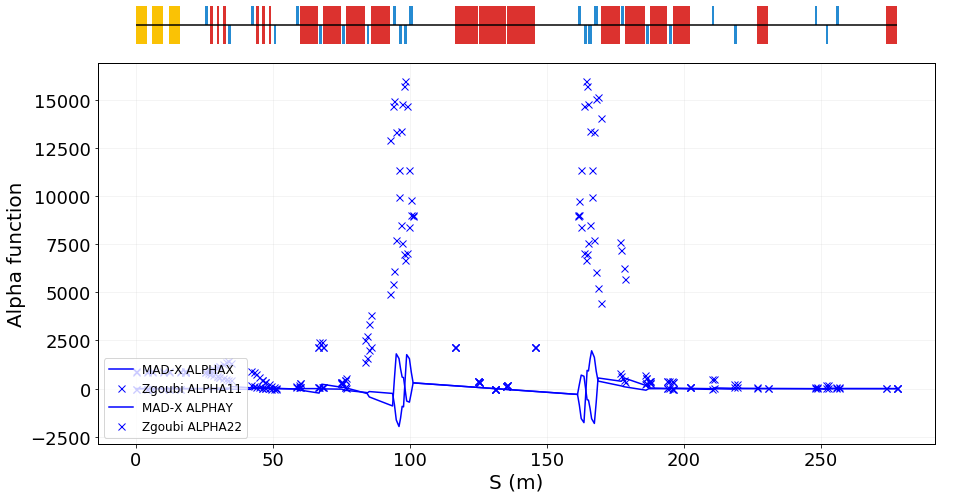

In [154]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
artist = zgoubidoo.vis.ZgoubiMpl(ax=ax)
zgoubidoo.vis.cartouche(line=zi_twiss, artist=artist)

ax.plot(lhec_ir.df['S'], lhec_ir.df['ALFX'], 'b-', ms=10, label='MAD-X ALPHAX')
ax.plot(zr_twiss.optics['S'], zr_twiss.optics['BETA11'], 'bx', ms=7, label='Zgoubi ALPHA11')

ax.plot(lhec_ir.df['S'], lhec_ir.df['ALFY'], 'b-', ms=10, label='MAD-X ALPHAY')
ax.plot(zr_twiss.optics['S'], zr_twiss.optics['BETA22'], 'bx', ms=7, label='Zgoubi ALPHA22')

ax.legend(loc=3, fontsize=12)
artist.ax.grid(True, alpha=0.2)
artist.ax.set_xlabel("S (m)", fontsize=20)
artist.ax.set_ylabel("Alpha function", fontsize=20)
artist.ax.tick_params(axis='both', which='major', labelsize=18)

#ax.text(100.0, 1500.0, f"{lhec_ir.table.loc['B0', 'ALFX']}", fontsize=12)
#ax.text(100.0, 1300.0, f"""{tw.query("LABEL1 == 'IP'").iloc[-1]['ALPHA11']:.4f}""", fontsize=12)

**Not cool!**

Can we do better?

Zgoubidoo is able to compute the Twiss parameters in the same way than Zgoubi:
- the transfer matrix is computed using finite differences
- the Twiss parameters are reconstructed

However, because of the powerful `survey` module in Zgoubidoo, the location and orientation of every element is known. Therefore, when reading the tracking data, Zgoubidoo will automatically convert the coordinates to the global coordinate system (remember, that's the one that we defined when doing the survey). The angles are also converted, so in the end all the Twiss paraters will behave correctly; even for crazy lattices with arbitraty rotations.

First we need to compute the transfer matrix.

In [162]:
zr_twiss.tracks['T'] = zr_twiss.tracks['TG']
zr_twiss.tracks['P'] = zr_twiss.tracks['PG']
zr_twiss.tracks['X'] = zr_twiss.tracks['XG']
zr_twiss.tracks['Y'] = zr_twiss.tracks['YG']
zr_twiss.tracks['Z'] = zr_twiss.tracks['ZG']
M = zgoubidoo.twiss.compute_transfer_matrix(beamline=zi_twiss, tracks=zr_twiss.tracks)
M.head(5)

,index,R11,R21,R31,R41,R51,R12,R22,R32,R42,...,R15,R25,R35,R45,R55,S,LABEL1,XG,YG,ZG
0,0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0,-8.868341e-08,LEFTIR$S_2,0.000000,0.000000e+00,0.000000
1,0,1.0,0.0,8.115387e-15,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0,-8.868341e-08,B1S01,0.000000,0.000000e+00,0.000000
2,1,1.0,0.0,0.000000e+00,-8.673617e-14,0.0,0.2,1.0,1.084202e-13,1.734723e-12,...,1.818773e-14,1.818777e-13,-0.000089,-0.000887,1.0,1.999999e-01,B1S01,0.199993,3.455981e-13,-0.001685
3,2,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.4,1.0,0.000000e+00,8.673617e-13,...,7.275125e-14,3.637579e-13,-0.000355,-0.001774,1.0,3.999999e-01,B1S01,0.399987,6.548207e-13,-0.003193
4,3,1.0,0.0,4.336809e-14,-4.336809e-14,0.0,0.6,1.0,0.000000e+00,0.000000e+00,...,1.636910e-13,5.456400e-13,-0.000798,-0.002660,1.0,5.999999e-01,B1S01,0.599983,9.276675e-13,-0.004523


Then we compute the Twiss parameters (note that the `BetaBlock` is used here):

In [163]:
zgoubidoo_twiss = zgoubidoo.twiss.compute_twiss(matrix=M, twiss_init=lhec_sequence.betablock)
zgoubidoo_twiss.head(5)

,index,R11,R21,R31,R41,R51,R12,R22,R32,R42,...,GAMMA11,GAMMA22,MU1,MU2,DET1,DET2,DISP1,DISP2,DISP3,DISP4
0,0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.000000e+00,...,0.001184,0.001144,0.000000,0.000000,1.0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1,0,1.0,0.0,8.115387e-15,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.000000e+00,...,0.001184,0.001144,0.000000,0.000000,1.0,0.999961,0.000000e+00,0.000000e+00,0.000000,0.000000
2,1,1.0,0.0,0.000000e+00,-8.673617e-14,0.0,0.2,1.0,1.084202e-13,1.734723e-12,...,0.001184,0.001144,0.000229,0.000224,1.0,0.999961,1.818773e-14,1.818777e-13,-0.000089,-0.000887
3,2,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.4,1.0,0.000000e+00,8.673617e-13,...,0.001184,0.001144,0.000458,0.000447,1.0,0.999961,7.275125e-14,3.637579e-13,-0.000355,-0.001774
4,3,1.0,0.0,4.336809e-14,-4.336809e-14,0.0,0.6,1.0,0.000000e+00,0.000000e+00,...,0.001184,0.001144,0.000687,0.000671,1.0,0.999961,1.636910e-13,5.456400e-13,-0.000798,-0.002660


We should now be able to plot everything.

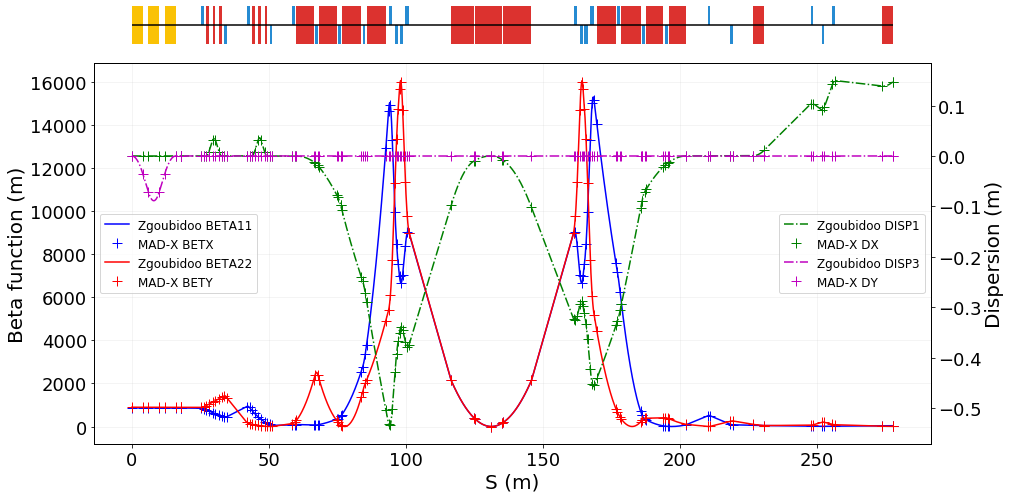

In [164]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
artist = zgoubidoo.vis.ZgoubiMpl(ax=ax)
zgoubidoo.vis.cartouche(line=zi_twiss, artist=artist)

ax.plot(zgoubidoo_twiss['S'], zgoubidoo_twiss['BETA11'], 'b-', ms=0.5, label='Zgoubidoo BETA11')
ax.plot(lhec_ir.df['S'] + zgoubidoo_twiss['S'].min(), lhec_ir.df['BETX'], 'b+', ms=10, label='MAD-X BETX')
#ax.plot(zr_twiss.optics['S'] + tw['S'].min(), zr_twiss.optics['BETA11'], 'bx', ms=7, label='Zgoubi BETA11')

ax.plot(zgoubidoo_twiss['S'], zgoubidoo_twiss['BETA22'], 'r-', ms=0.5, label='Zgoubidoo BETA22')
ax.plot(lhec_ir.df['S'] + zgoubidoo_twiss['S'].min(), lhec_ir.df['BETY'], 'r+', ms=10, label='MAD-X BETY')
#ax.plot(zr_twiss.optics['S'] + tw['S'].min(), zr_twiss.optics['BETA22'], 'rx', ms=7, label='Zgoubi BETA22')


ax2 = ax.twinx()
ax2.plot(zgoubidoo_twiss['S'], zgoubidoo_twiss['DISP1'], 'g-.', ms=0.5, label='Zgoubidoo DISP1')
ax2.plot(lhec_ir.df['S'] + zgoubidoo_twiss['S'].min(), lhec_ir.df['DX'], 'g+', ms=10, label='MAD-X DX')
#ax2.plot(zr_twiss.optics['S'] + tw['S'].min(), zr_twiss.optics['DISP1'], 'gx', ms=7, label='Zgoubi DISP1')

ax2.plot(zgoubidoo_twiss['S'], zgoubidoo_twiss['DISP3'], 'm-.', ms=0.5, label='Zgoubidoo DISP3')
ax2.plot(lhec_ir.df['S'] + zgoubidoo_twiss['S'].min(), lhec_ir.df['DY'], 'm+', ms=10, label='MAD-X DY')
#ax2.plot(zr_twiss.optics['S'] + tw['S'].min(), zr_twiss.optics['DISP3'], 'mx', ms=7, label='Zgoubi DISP3')

ax.legend(loc=6, fontsize=12)
ax2.legend(loc=5, fontsize=12)
artist.ax.grid(True, alpha=0.2)
artist.ax.set_xlabel("S (m)", fontsize=20)
artist.ax.set_ylabel("Beta function (m)", fontsize=20)
artist.ax.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel("Dispersion (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=18)

## backward tracking ! For transfer matrix in case of large fringe fields, etc. check with the S coordinate

Lattices for the workshop : ESRF ? Or PSR ? Maybe PSR is easier. Then FFA.

PSR
FFA
ESRF